In [1]:
import numpy as np
import pandas as pd
from compare_models import plot_confusion_matrix, calc_best_threshold

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
DIRCTORY_PATH = 'preds_and_dfs/'
MODEL_NAME = 'MLP'
MODEL_TO_INSPECT = DIRCTORY_PATH + 'model_predictions/{}_predictions.csv'.format(MODEL_NAME)

In [3]:
df_train = pd.read_csv(DIRCTORY_PATH + "df_train.csv")
df_test = pd.read_csv(DIRCTORY_PATH + "df_test.csv")
y_hat = pd.read_csv(MODEL_TO_INSPECT, header=None).iloc[:, 0]
y_true = df_test.is_funny
threshold = calc_best_threshold([y_true], [y_hat], ['model'])['model']
df_train.shape, df_test.shape, y_hat.shape, threshold

((38676, 23), (7821, 23), (7821,), 0.21954689919948575)

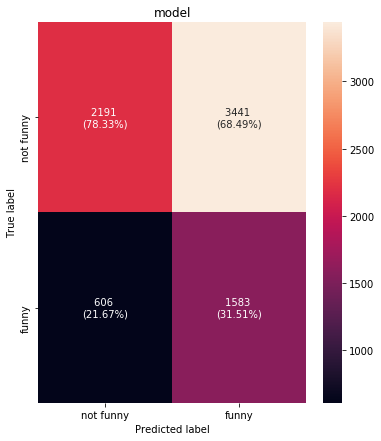

In [4]:
plot_confusion_matrix([y_true], [y_hat], ['model'], out_dir=None)

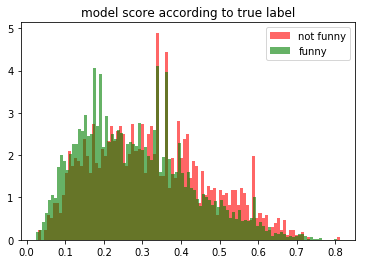

In [5]:
def plot_scores(labels, y_hat):
    y_hat_negative = y_hat[labels]
    y_hat_positive = y_hat[labels == False]
    
    plt.hist(y_hat_negative, bins=100, color='red', alpha=0.6, label='not funny', density=1)
    plt.hist(y_hat_positive, bins=100, color='green', alpha=0.6, label='funny', density=1)
    plt.legend()
    plt.title("model score according to true label")
    plt.show()
plot_scores(y_true, y_hat)

We can see from the graph above that the separation is not very good.  
We wished to see all the green bars close to 1 and the red bars close to zero.  

Let's examine some examples

## Examine FP

In [6]:
y_hat_neg = y_hat[y_true == 0]

# first look at the 20 worst FP (highst score but wrong)
df_test.iloc[y_hat_neg.iloc[np.argsort(y_hat_neg)[::-1][:10].values].index, :]

,Unnamed: 0,character,txt,num_words,avg_word_length,start,end,length,is_funny,laugh_time,...,season,total_lines,global_episode_num,time_from_prev,new_scene,scene_text,scene_characters,n_scene_characters,scene_number_in_episode,global_scene_number
3136,14168,TESTIKOV,War...,1.0,6.000000,593.293,594.327,1.034,False,NaN,...,5,516,30,0.000,False,Algae.\nObviously plankton.\nI don't know what...,"{'GEORGE', 'ELAINE', 'TESTIKOV', 'LIPPMAN'}",4,17,1354
2943,13975,JERRY,and insisted he change it to War and Peace.,9.0,3.500000,125.726,127.919,2.193,False,NaN,...,5,516,30,0.076,False,"No, I'm not kidding, Elaine. It's true.\nHis m...","{'ELAINE', 'JERRY'}",2,3,1340
3585,17080,GEORGE,Above the rim.,3.0,4.000000,488.618,490.215,1.597,False,NaN,...,6,413,36,0.000,False,So let me get this straight. You find yoursel...,"{'GEORGE', 'JERRY', 'KRAMER'}",3,16,1647
3528,17023,LINDSAY,Mother.,1.0,7.000000,308.676,309.591,0.915,False,NaN,...,6,413,36,0.071,False,"George, it is so nice to finally meet you.\nA...","{'GEORGE', 'MRS.ENRIGHT', 'LINDSAY'}",3,11,1642
1359,2365,GEORGE,That's the kind of a sick city we're living in!,10.0,3.454545,911.753,913.980,2.227,False,NaN,...,4,540,5,0.069,False,A month and a half we had. We did nothing.\nW...,"{'GEORGE', 'JERRY', 'WOMAN'}",3,21,183
6095,34054,NEWMAN,The dream is dead.,4.0,3.750000,699.066,701.333,2.267,False,NaN,...,8,597,71,0.033,False,The guy who had the Hawaii transfer\ngot bust...,"{'JERRY', 'NEWMAN'}",2,29,3305
2403,11492,JERRY,Just keep the music down.,5.0,4.200000,17.952,20.384,2.432,False,NaN,...,5,502,25,0.071,False,If there is a serial killer loose in your nei...,{'JERRY'},1,1,1090
6107,34066,JERRY,[BOTH LAUGHING SNIDELY],3.0,7.000000,725.933,727.200,1.267,False,NaN,...,8,597,71,1.433,False,"What are you proposing?\nWhatever it takes,\nf...","{'ELAINE', 'JERRY', 'NEWMAN'}",3,31,3307
4615,21081,KRAMER,The Velvet Fog.,3.0,4.333333,750.534,752.397,1.863,False,NaN,...,6,454,44,11.481,True,The Velvet Fog.\nWhat about the Velvet Fog?\nW...,"{'ELAINE', 'JERRY', 'KRAMER'}",3,29,1991
1801,5631,NEWMAN,on a mountain of gold.,5.0,3.600000,819.519,820.450,0.931,False,NaN,...,4,414,12,0.076,False,"Hey.\nHey.\nWell, here's your albums.\nWhat ha...","{'GEORGE', 'NEWMAN', 'JERRY', 'KRAMER'}",4,21,499


In [7]:
# Hard to see anything meaningful, let's try to set a threshold and look at all FP
FP_idx = y_hat_neg[y_hat_neg > threshold].index
fp_df = df_test.iloc[FP_idx, :]

In [8]:
def plot_fp_column(df_test, fp_idx, column):
    fp_df = df_test.iloc[fp_idx, :]
    fp_column_norm = (fp_df.groupby(by=column).size() / df_test.groupby(by=column).size())
    plt.bar(fp_column_norm.index, height=fp_column_norm.values)
    plt.title("FP per {} normalized".format(column))
    plt.show()

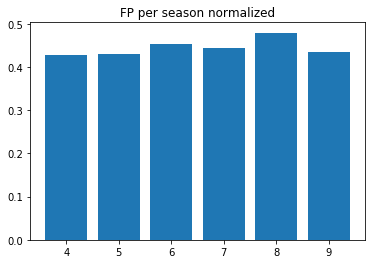

In [9]:
plot_fp_column(df_test, FP_idx, 'season')